# TimML Notebook 0
## Single layer flow

Consider uniform flow from East to West. The gradient is 0.001. The hydraulic conductivity is $k=10$ m/d. The aquifer bottom and top are at 0 m and 10 m. The head at $x=-1000$ m and $y=0$ is fixed at 41 m. 

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install timml

In [1]:
import timml as tml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ml = tml.ModelMaq(kaq=10, z=[10, 0])

In [3]:
rf = tml.Constant(ml, xr=-1000, yr=0, hr=41)

In [4]:
uf = tml.Uflow(ml, slope=0.001, angle=0)

In [5]:
ml.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


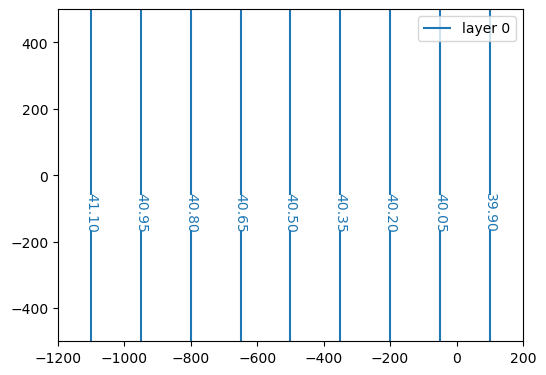

In [6]:
ml.contour(win=[-1200, 200, -500, 500], ngr=50,
           levels=10, labels=True, decimals=2, legend=True, figsize=(6, 6));

The default contour levels are not what we want for this example, so let's specify the levels 
to go from 39 to 42 with steps of 0.1 (not all those levels are present in the current window).

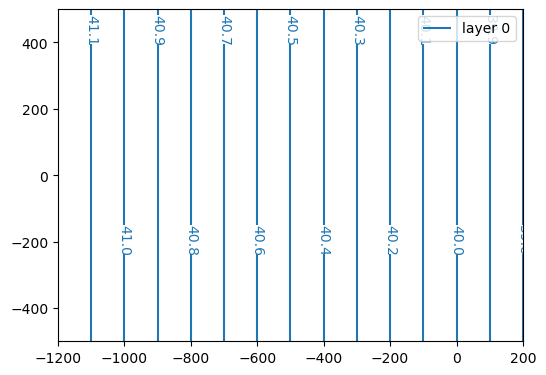

In [7]:
ml.contour(win=[-1200, 200, -500, 500], ngr=50,
           levels=np.arange(39, 42, 0.1), labels=True, decimals=1, figsize=(6, 6));

A well is located at $(x,y)=(-400,0)$ with a discharge $Q=50$ m$^3$ and a radius of 0.2 m.

In [8]:
w = tml.Well(ml, xw=-400, yw=0, Qw=50., rw=0.2)

After the well is added (or any other elements), the model needs to be solved again. A contour plot is created and a 10 strace line are added. The stepsize is given in meters and represents the largest space step that is taken, but it is reduced when certain accuracy constraints are not met. Note that, after running the code cell below, for each trace line it is printed to the screen what the reason was that the traceline was aborted. In this case it was either because the trace line reached a well or reached the maximum number of steps (the default is 100 steps, but this can be changed by specifying the `nstepmax` keyword).  

Number of elements, Number of equations: 3 , 1
...
solution complete
.


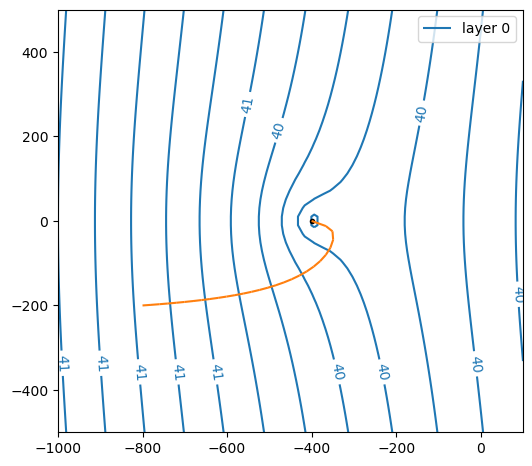

In [9]:
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(6, 6))
ml.tracelines(-800 * np.ones(1), -200 * np.ones(1), np.zeros(1), hstepmax=20, color='C1')

### Exercise a
Draw 10 tracelines from $x=-800$ and different values of $y$.

..........


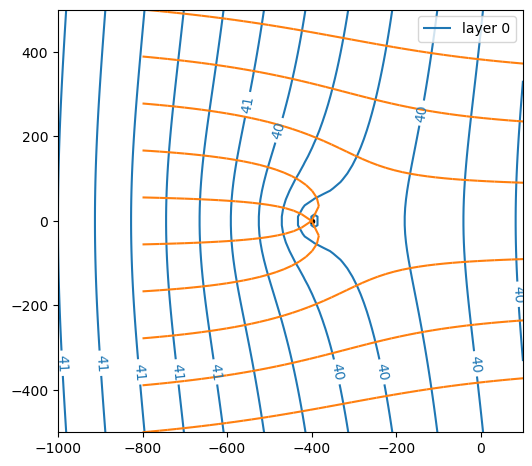

In [10]:
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(6, 6))
ml.tracelines(-800 * np.ones(10), np.linspace(-500, 500, 10), np.zeros(10), hstepmax=20, color='C1')

### Exercise b
Quadruple the discharge of the well and reproduce the same figure

Number of elements, Number of equations: 3 , 1
...
solution complete
..........
('head at well:', array([37.85129405]))


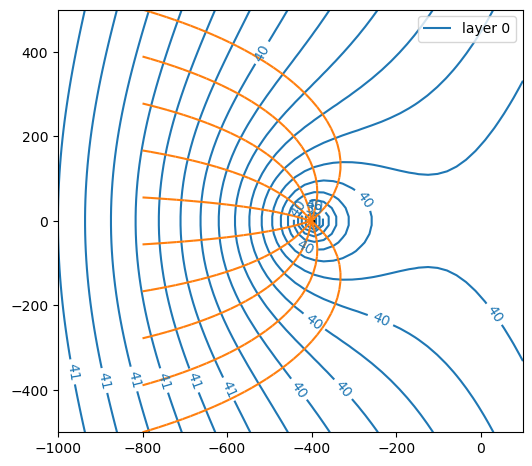

In [11]:
ml = tml.ModelMaq(kaq=10, z=[10, 0])
rf = tml.Constant(ml, xr=-1000, yr=0, hr=41)
uf = tml.Uflow(ml, slope=0.001, angle=0)
w = tml.Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(6, 6))
ml.tracelines(-800 * np.ones(10), np.linspace(-500, 500, 10), np.zeros(10), hstepmax=20, color='C1')
print(('head at well:', w.headinside()))

### Add a river
A river runs along $x=0$. The water level in the river is at 40 m. Note that one head-specified line-sink of uniform flux only fixes the head at one point (in this case $(x,y)=(0,0)$). That is not a very good representation of a river.  

Number of elements, Number of equations: 4 , 2
....
solution complete
('head at well:', array([37.90853612]))


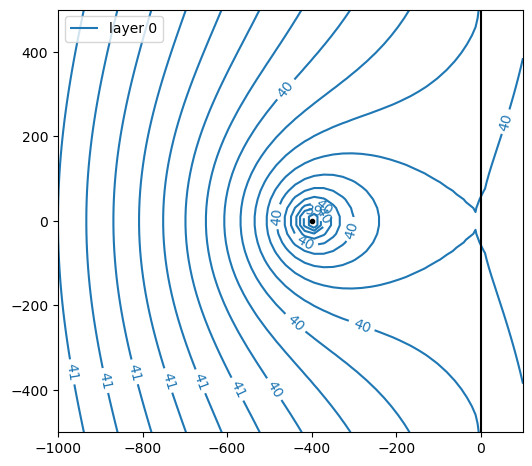

In [12]:
ml = tml.ModelMaq(kaq=10, z=[10, 0])
rf = tml.Constant(ml, xr=-1000, yr=0, hr=41)
uf = tml.Uflow(ml, slope=0.001, angle=0)
w = tml.Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
ls1 = tml.HeadLineSink(ml, 0, -500, 0, 500, 40)
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(6, 6))
print(('head at well:', w.headinside()))

### Exercise c
Simulate the river with 20 line-sinks from $y=-800$ to $y=800$. Now that head is fixed at 20 points (the midpoints of the line-sinks), and the head is fairly constant along the river. 

Number of elements, Number of equations: 4 , 21
....
solution complete
..........
.....


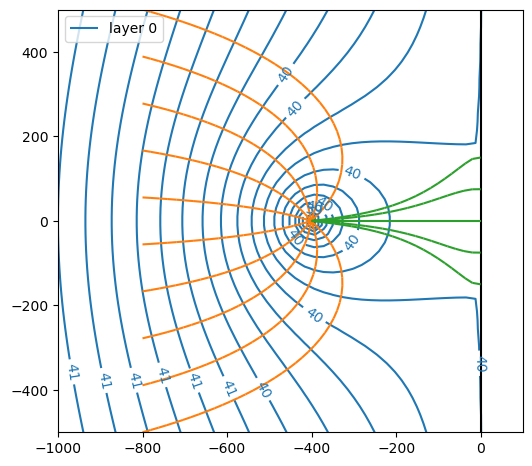

In [13]:
ml = tml.ModelMaq(kaq=10, z=[10, 0])
rf = tml.Constant(ml, xr=-1000, yr=0, hr=41)
uf = tml.Uflow(ml, slope=0.001, angle=0)
w = tml.Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
xls = np.zeros(21)
yls = np.linspace(-800, 800, 21)
ls = tml.HeadLineSinkString(ml, xy=list(zip(xls, yls)), hls=40, layers=0, label='river')
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(6, 6))
ml.tracelines(-800 * np.ones(10), np.linspace(-500, 500, 10), np.zeros(10), hstepmax=20, color='C1')
ml.tracelines(-0.01 * np.ones(5), np.linspace(-150, 150, 5), np.zeros(5), hstepmax=20, color='C2')

### Capture zone
Create a five year capture zone. You may want to create a contour plot first.

....................


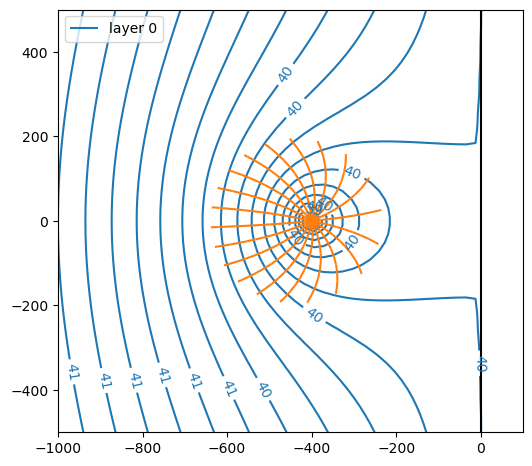

In [14]:
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), layers=0, figsize=(6, 6))
w.plotcapzone(hstepmax=20, nt=20, zstart=0, tmax=5 * 365.25, color='C1')

### Exercise d
Create a 20 year capture zone using 20 tracelines.

....................


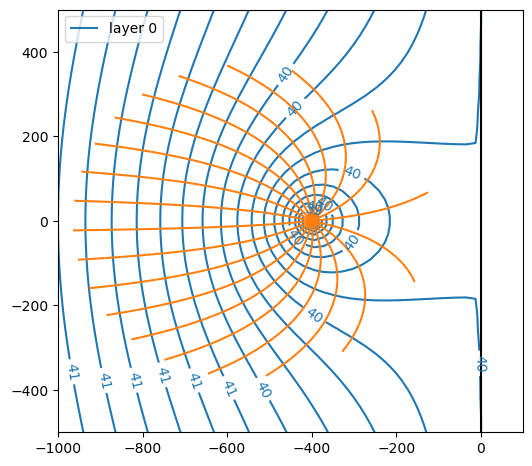

In [15]:
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), layers=0, figsize=(6, 6))
w.plotcapzone(hstepmax=20, nt=20, zstart=0, tmax=20 * 365.25, color='C1')

### Head-specified wells
Consider uniform flow from East to West. The gradient is 0.001. The hydraulic conductivity is $k=10$ m/d. The aquifer bottom and top are at 0 m and 10 m. The head at $x=-1000$ m and $y=0$ is fixed at 41 m. Four wells are located at (-800, -200), (-800, 200), (-400, -200), and (-400, 200), all with radius of 0.3 m, and specified head 40 m.

Number of elements, Number of equations: 6 , 5
......
solution complete
[40.]
[40.]
[40.]
[40.]


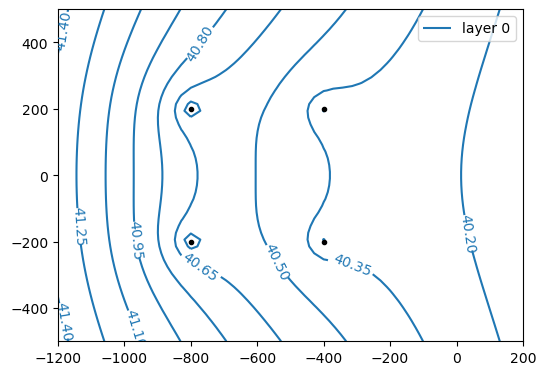

In [16]:
ml = tml.ModelMaq(kaq=10, z=[10, 0])
rf = tml.Constant(ml, xr=-1000, yr=0, hr=41)
uf = tml.Uflow(ml, slope=0.001, angle=0)
w1 = tml.HeadWell(ml, -800, -200, 40, rw=0.3)
w2 = tml.HeadWell(ml, -800, 200, 40, rw=0.3)
w3 = tml.HeadWell(ml, -400, -200, 40, rw=0.3)
w4 = tml.HeadWell(ml, -400, 200, 40, rw=0.3)
ml.solve()
ml.contour(win=[-1200, 200, -500, 500], ngr=50,
           levels=10, labels=True, decimals=2, legend=True, figsize=(6, 6))
print(ml.head(-800 + 0.3, -200))
print(ml.head(-800 + 0.3, 200))
print(ml.head(-400 + 0.3, -200))
print(ml.head(-400 + 0.3, 200))

### Head-specified wells with control points at different locations
The same setup as the previous aquifer, exercise, but now the wells are located at (-700, -100), (-700, 100), (-500, -100), and (-500, 100), and the corresponding control points where the head is 40 m are at (-800, -200), (-800, 200), (-400, -200), and (-400, 200).

Number of elements, Number of equations: 6 , 5
......
solution complete
[40.]
[40.]
[40.]
[40.]


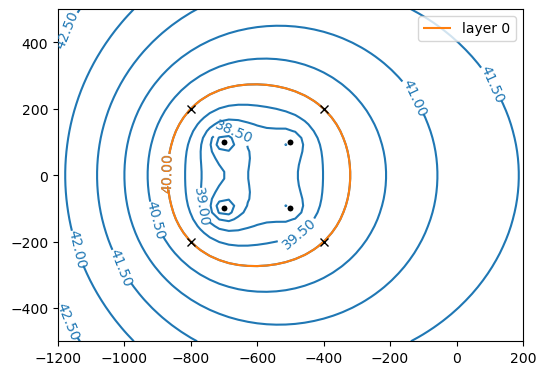

In [17]:
ml = tml.ModelMaq(kaq=10, z=[10, 0])
rf = tml.Constant(ml, xr=-1000, yr=0, hr=41)
uf = tml.Uflow(ml, slope=0.001, angle=0)
w1 = tml.HeadWell(ml, -700, -100, 40, rw=0.3, xc=-800, yc=-200)
w2 = tml.HeadWell(ml, -700, 100, 40, rw=0.3, xc=-800, yc=200)
w3 = tml.HeadWell(ml, -500, -100, 40, rw=0.3, xc=-400, yc=-200)
w4 = tml.HeadWell(ml, -500, 100, 40, rw=0.3, xc=-400, yc=200)
ml.solve()
ml.contour(win=[-1200, 200, -500, 500], ngr=50,
           levels=10, labels=True, decimals=2, legend=True, figsize=(6, 6))
ml.contour(win=[-1200, 200, -500, 500], ngr=50, color='C1',
           levels=[40,], labels=True, decimals=2, legend=True, figsize=(6, 6), newfig=False)
plt.plot([-800, -800, -400, -400], [-200, 200, -200, 200], 'kx')
print(ml.head(-800, -200))
print(ml.head(-800, 200))
print(ml.head(-400, -200))
print(ml.head(-400, 200))